In [1]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sentence_transformers import SentenceTransformer
import numpy as np

from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [2]:
sentences = pd.read_csv('../data/processed/temple_radio_1_2_sentences_with_translation.csv')
sent_embeddings = genfromtxt('../data/processed/temple_radio_1_2_sentence_embeddings.csv', delimiter=',')

In [3]:
# Normalize the embeddings to unit length
corpus_embeddings = sent_embeddings / np.linalg.norm(sent_embeddings, axis=1, keepdims=True)

In [4]:
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5)
clustering_model.fit(corpus_embeddings)
clustering_assignment = clustering_model.labels_

In [5]:
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(clustering_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []
    clustered_sentences[cluster_id].append(list(sentences.Sentence)[sentence_id])

In [11]:
for i, cluster in clustered_sentences.items():
    print(f"Cluster {i+1}")
#     print(cluster)
#     print("")
#     pd.Series(cluster).to_csv(f'../data/processed/hierarchical_cluster{i+1}_results.csv', header=False)

Cluster 1
Cluster 2
Cluster 5
Cluster 4
Cluster 3


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [20.0, 20.0, 53.75, 53.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [92.5, 92.5, 123.75, 123.75],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [162.5, 162.5, 192.5, 192.5],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [220.0, 220.0, 242.5, 242.5],
  [177.5, 177.5, 231.25, 231.25],
  [108.125, 108.125, 204.375, 204.375],
  [36.875, 36.875, 156.25, 156.25],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [290.0, 290.0, 312.5, 312.5],
  [270.0, 270.0, 301.25, 301.25],
  [345.0, 345.

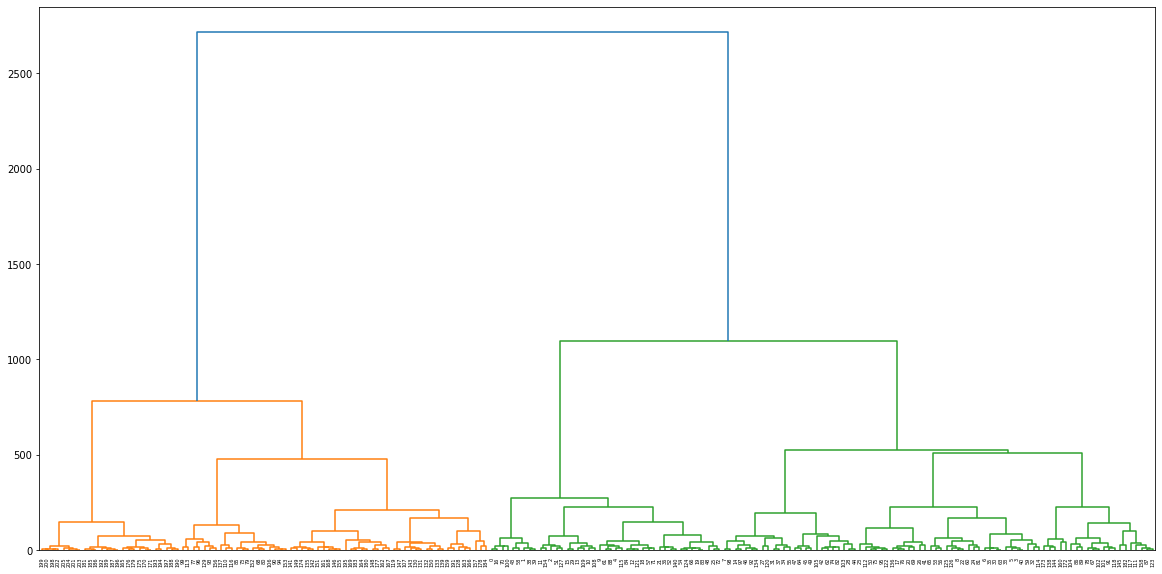

In [8]:
Z = hierarchy.linkage(clustering_model.children_, 'ward')
plt.figure(figsize=(20,10))
hierarchy.dendrogram(Z)

In [ ]:
num_clusters = 3
model = AgglomerativeClustering(n_clusters=num_clusters)
model = model.fit(sent_embeddings)

In [ ]:
print(sentences.Sentence[1:2])
print(sentences.Sentence[6:7])

In [ ]:
# plt.figure(figsize=(10, 7))
# plt.scatter(sent_embeddings[:,0], sent_embeddings[:,1], c=model.labels_, cmap='rainbow')

In [ ]:
Z = hierarchy.linkage(model.children_, 'ward')
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

In [ ]:
df_clusters = pd.DataFrame(list(zip(list(sentences.Sentence), model.labels_)), columns=['Sentence', 'Cluster'])

In [ ]:
# df_clusters.to_csv('../data/processed/temple_clustering_results.csv')

In [ ]:
print(f"Cluster 0: {len(df_clusters[df_clusters.Cluster == 0])}")
print(f"Cluster 1: {len(df_clusters[df_clusters.Cluster == 1])}")
print(f"Cluster 2: {len(df_clusters[df_clusters.Cluster == 2])}")
print(f"Cluster 3: {len(df_clusters[df_clusters.Cluster == 3])}")

In [ ]:
pd.Series(df_clusters[df_clusters.Cluster == 0].Sentence.unique()).to_csv('../data/processed/cluster0_temple_results.csv', header=False)
pd.Series(df_clusters[df_clusters.Cluster == 1].Sentence.unique()).to_csv('../data/processed/cluster1_temple_results.csv', header=False)
pd.Series(df_clusters[df_clusters.Cluster == 2].Sentence.unique()).to_csv('../data/processed/cluster2_temple_results.csv', header=False)
pd.Series(df_clusters[df_clusters.Cluster == 3].Sentence.unique()).to_csv('../data/processed/cluster3_temple_results.csv', header=False)

In [ ]:
result = {'Cluster':model.labels_, 'Groups': list(sentences[0])}
result = pd.DataFrame(result)

In [ ]:
pd.option_context('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
for k in range(0, num_clusters):
    s = result[result.Cluster == k]
    text = s['Groups'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
#     print('Sentences')
    sentences_wc = df_clusters[df_clusters.Cluster == k]['Sentence']
#     print(sentences_wc[:10].to_string(index=False))
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()